# Principal Component Analysis (PCA) Step-by-Step Example

This notebook provides a detailed, step-by-step guide to applying Principal Component Analysis (PCA) on a dataset. We'll cover each step with explanations, code, and visualizations.

## Step 1: What is PCA?

PCA is a dimensionality reduction technique that transforms data into a new coordinate system. The axes in this new system (called principal components) are ordered by the amount of variance they capture. PCA is useful for reducing the number of dimensions in a dataset while retaining as much information as possible.

## Step 2: Importing Required Libraries

We'll start by importing the necessary libraries for this analysis, including NumPy, Pandas, Matplotlib, and Scikit-learn.


In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


## Step 3: Data Creation

We'll generate a synthetic dataset with 100 samples and 5 features for this demonstration. This dataset will be used to illustrate how PCA works.


In [2]:
np.random.seed(0)
data = np.random.randn(100, 5)  # 100 samples, 5 features
df = pd.DataFrame(data, columns=[f'Feature_{i}' for i in range(1, 6)])
df.head()


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5
0,1.764052,0.400157,0.978738,2.240893,1.867558
1,-0.977278,0.950088,-0.151357,-0.103219,0.410599
2,0.144044,1.454274,0.761038,0.121675,0.443863
3,0.333674,1.494079,-0.205158,0.313068,-0.854096
4,-2.552990,0.653619,0.864436,-0.742165,2.269755


## Step 4: Data Standardization

PCA is affected by the scale of the data, so it's important to standardize the features before applying PCA. We'll use Scikit-learn's `StandardScaler` for this purpose.


In [3]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


## Step 5: Applying PCA

Now, we'll apply PCA to the standardized data. We'll reduce the dimensionality from 5 features down to 2 principal components.


In [4]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
df_pca = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
df_pca.head()


,Principal Component 1,Principal Component 2
0,-1.795881,0.909513
1,-0.996747,-0.166233
2,-1.088453,0.074674
3,-0.201783,1.062245
4,-2.369830,-2.257856


## Step 6: Explained Variance

The explained variance tells us how much information (variance) is captured by each principal component. We'll look at both the individual and cumulative explained variance.


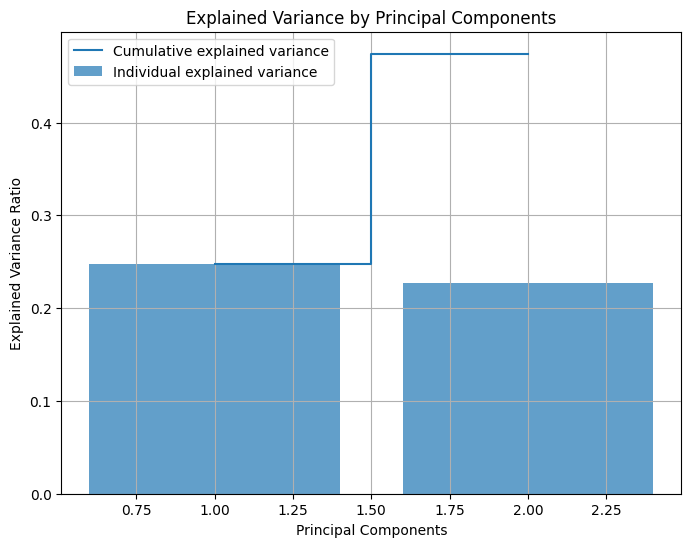

In [5]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.grid(True)
plt.show()


## Step 7: Visualizing the PCA Results

We can visualize the data in the new 2D space defined by the first two principal components.


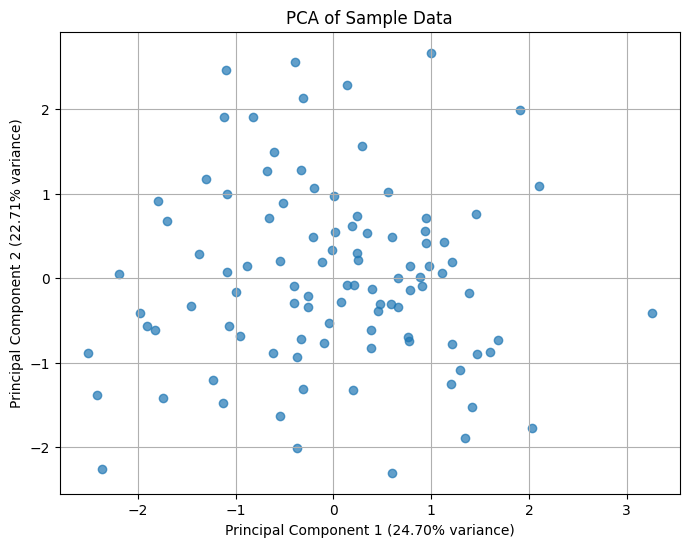

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['Principal Component 1'], df_pca['Principal Component 2'], alpha=0.7)
plt.xlabel(f'Principal Component 1 ({explained_variance[0]*100:.2f}% variance)')
plt.ylabel(f'Principal Component 2 ({explained_variance[1]*100:.2f}% variance)')
plt.title('PCA of Sample Data')
plt.grid(True)
plt.show()


## Step 8: Reconstructing Data from Principal Components

To understand how much information was lost during the dimensionality reduction, we can try to reconstruct the original data from the principal components and compare it to the original standardized data.


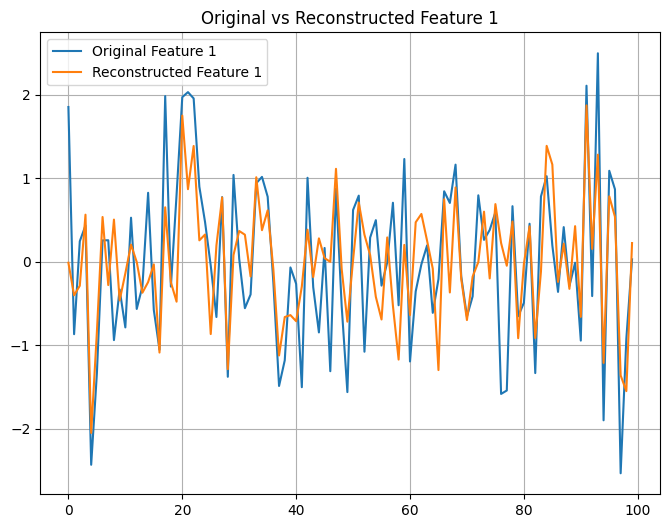

In [7]:
reconstructed_data = pca.inverse_transform(principal_components)
df_reconstructed = pd.DataFrame(data=reconstructed_data, columns=df.columns)

# Plotting the first feature for comparison
plt.figure(figsize=(8, 6))
plt.plot(scaled_data[:, 0], label='Original Feature 1')
plt.plot(reconstructed_data[:, 0], label='Reconstructed Feature 1')
plt.title('Original vs Reconstructed Feature 1')
plt.legend()
plt.grid(True)
plt.show()


## Step 9: Detailed Analysis and Further Applications

PCA can be extended to more components or applied to different datasets. The method is also useful for noise reduction, feature selection, and data compression. Experiment with different numbers of principal components to see how it affects the variance retained and the quality of the reconstructed data.
